In [1]:
from pulp import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Dorin MANEA 
# Iarina NISTOR - 21210925

In [3]:
#Exercice 1

In [4]:
data=pd.read_csv('confiserie.csv',header=None)
data

,0,1,2
0,Australia,17.3,327.4
1,Austria,7.7,179.5
2,Belgium,10.4,279.4
3,Denmark,5.1,139.1
4,Finland,5.0,92.5
5,France,56.9,926.7
6,Germany,79.7,2186.3
7,Ireland,3.5,96.8
8,Italy,57.8,523.9
9,Japan,124.0,935.9


In [5]:
dt=data.to_numpy()
x=dt[:,1]
y=dt[:,2]

In [6]:
def cov(x,y):
    return (1 / len(x))*np.sum((x - np.mean(x))*(y - np.mean(y)))
    

In [7]:
def regression_mc(x, y):
    m = cov(x, y)/np.var(x)
    p = np.mean(y) - m*np.mean(x)
    return m, p

In [8]:
#b,a=regression_mc(x,y)

In [9]:
exo1 = LpProblem(name="Exercice1", sense=LpMinimize)
n = len(data)
z = LpVariable.matrix("z", list(range(1,n+1)))
a=LpVariable("a",  lowBound=0)
b=LpVariable("b",  lowBound=0)
exo1 += lpSum(z)
for i in range(0,n):
    exo1 += (z[i] >= y[i]-a-b*x[i]) 
    exo1 += (z[i] >= a+b*x[i]-y[i])
print(exo1)
status = exo1.solve(solver=GLPK(msg=True,keepFiles=True)) #keepFiles permet de créer un fichier .sol contenant la solution
print("Status:", LpStatus[exo1.status])


Exercice1:
MINIMIZE
1*z_1 + 1*z_10 + 1*z_11 + 1*z_12 + 1*z_13 + 1*z_14 + 1*z_15 + 1*z_16 + 1*z_17 + 1*z_2 + 1*z_3 + 1*z_4 + 1*z_5 + 1*z_6 + 1*z_7 + 1*z_8 + 1*z_9 + 0
SUBJECT TO
_C1: a + 17.3 b + z_1 >= 327.4

_C2: - a - 17.3 b + z_1 >= -327.4

_C3: a + 7.7 b + z_2 >= 179.5

_C4: - a - 7.7 b + z_2 >= -179.5

_C5: a + 10.4 b + z_3 >= 279.4

_C6: - a - 10.4 b + z_3 >= -279.4

_C7: a + 5.1 b + z_4 >= 139.1

_C8: - a - 5.1 b + z_4 >= -139.1

_C9: a + 5 b + z_5 >= 92.5

_C10: - a - 5 b + z_5 >= -92.5

_C11: a + 56.9 b + z_6 >= 926.7

_C12: - a - 56.9 b + z_6 >= -926.7

_C13: a + 79.7 b + z_7 >= 2186.3

_C14: - a - 79.7 b + z_7 >= -2186.3

_C15: a + 3.5 b + z_8 >= 96.8

_C16: - a - 3.5 b + z_8 >= -96.8

_C17: a + 57.8 b + z_9 >= 523.9

_C18: - a - 57.8 b + z_9 >= -523.9

_C19: a + 124 b + z_10 >= 935.9

_C20: - a - 124 b + z_10 >= -935.9

_C21: a + 15.1 b + z_11 >= 444.2

_C22: - a - 15.1 b + z_11 >= -444.2

_C23: a + 4.3 b + z_12 >= 119.7

_C24: - a - 4.3 b + z_12 >= -119.7

_C25: a + 39 b +

In [10]:
b_mc,a_mc=regression_mc(x,y)

In [11]:
def fig_regression_mc(x,y):
    a = regression_mc(x,y)[1]
    b = regression_mc(x,y)[0]
    return plt.plot(x,a+b*x,color='red') and fig_nuage(x,y)

In [12]:
def fig_nuage(x,y):
    return plt.scatter(x,y,s=75,color='pink')

In [13]:
value(a),value(b)

(25.9376, 20.2464)

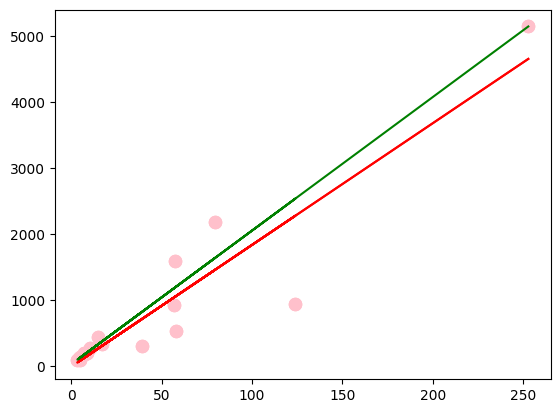

In [14]:
fig_regression_mc(x,y)
fig_nuage(x,y)
fig_regression_mc(x,y)
plt.plot(x,value(a)+value(b)*x,color="green")

In [15]:
#Changement valeur aberrante

In [16]:
d22=data.to_numpy()
d22[len(d22)-1,1]=5.27
d22

array([['Australia', 17.3, 327.4],
       ['Austria', 7.7, 179.5],
       ['Belgium', 10.4, 279.4],
       ['Denmark', 5.1, 139.1],
       ['Finland', 5.0, 92.5],
       ['France', 56.9, 926.7],
       ['Germany', 79.7, 2186.3],
       ['Ireland', 3.5, 96.8],
       ['Italy', 57.8, 523.9],
       ['Japan', 124.0, 935.9],
       ['Netherland', 15.1, 444.2],
       ['Norway', 4.3, 119.7],
       ['Spain', 39.0, 300.7],
       ['Sweden', 8.7, 201.9],
       ['Switzerland', 6.9, 194.7],
       ['United-Kingdom', 57.7, 1592.9],
       ['United-States', 5.27, 5142.2]], dtype=object)

In [17]:
x2=d22[:,1]
y2=d22[:,2]

In [18]:
exo2 = LpProblem(name="Exercice2", sense=LpMinimize)
n = len(data)
z2 = LpVariable.matrix("z", list(range(1,n+1)),lowBound=0)
a2=LpVariable("a2",  lowBound=0)
b2=LpVariable("b2",  lowBound=0)
exo2 += lpSum(z2)
for i in range(0,n):
    exo2 += (z2[i] >= y2[i]-a2-b2*x2[i]) 
    exo2 += (z2[i] >= a2+b2*x2[i]-y2[i])
status = exo2.solve(solver=GLPK(msg=True,keepFiles=True)) #keepFiles permet de créer un fichier .sol contenant la solution
print("Status:", LpStatus[exo2.status])

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --cpxlp Exercice2-pulp.lp -o Exercice2-pulp.sol
Reading problem data from 'Exercice2-pulp.lp'...
34 rows, 19 columns, 102 non-zeros
40 lines were read
GLPK Simplex Optimizer 5.0
34 rows, 19 columns, 102 non-zeros
Preprocessing...
34 rows, 19 columns, 102 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.240e+02  ratio =  1.240e+02
GM: min|aij| =  4.099e-01  max|aij| =  2.440e+00  ratio =  5.952e+00
EQ: min|aij| =  1.680e-01  max|aij| =  1.000e+00  ratio =  5.952e+00
Constructing initial basis...
Size of triangular part is 34
      0: obj =   0.000000000e+00 inf =   9.210e+03 (17)
     27: obj =   9.866566000e+03 inf =   1.421e-14 (0)
*    30: obj =   8.663818023e+03 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.1 Mb (68353 bytes)
Writing basic solution to 'Exercice2-pulp.sol'...
Status: Optimal


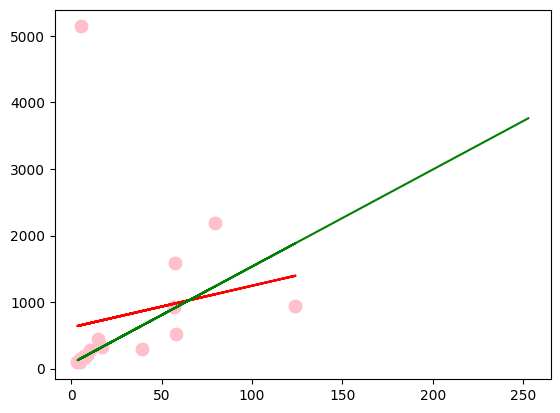

In [19]:
fig_regression_mc(x2,y2)
fig_nuage(x2,y2)
fig_regression_mc(x2,y2)
plt.plot(x,value(a2)+value(b2)*x,color="green")

In [20]:
#La droite LAD n'a pas ete touchee par la valeur aberrante car elle repose sur la valeur absolue

In [21]:
# exo2

In [22]:
df = pd.read_csv("ozoneApprentissage.csv", header=None)
ozone = df.to_numpy()
df

,0,1,2,3,4
0,3,6,2,8,3
1,7,7,11,14,15
2,11,11,23,33,19
3,15,12,26,34,27
4,21,16,12,5,23
5,23,17,16,10,23
6,28,22,22,15,31
7,31,16,28,24,39
8,38,21,34,31,47
9,39,27,27,8,51


In [23]:
x1=ozone[:,0]
x2=ozone[:,1]
x3=ozone[:,2]
x4=ozone[:,3]
y3=ozone[:,4]
x_ = df.iloc[:, :-1].to_numpy(dtype="float64")
y_ = df.iloc[:, -1].to_numpy(dtype="float64")
x_mean = [np.mean(x_[:, i]) for i in range(4)]
x_ecart = [np.std(x_[:, i]) for i in range(4)]

In [24]:
exo3 = LpProblem(name="Exercice3", sense=LpMinimize)
n = len(ozone)
z3 = LpVariable.matrix("z", list(range(1,n+1)),lowBound=0)
beta=LpVariable.matrix("beta", list(range(5)), lowBound=0)
beta[0]

beta_0

In [25]:
sigma=[]
normalise=[]
for i in range(4):
    x_temp = ozone[:, i]
    avg_x = np.mean(x_temp)
    sigma.append(np.std(x_temp))
    normalise.append((x_temp - avg_x)/sigma[i])
sigma
x_norm = np.transpose(normalise)

In [26]:
x_norm

array([[-1.38785276, -1.35822495, -1.78460428, -1.18239513],
       [-1.25096866, -1.29197008, -1.24014874, -0.59119757],
       [-1.11408455, -1.02695058, -0.51420801,  1.28092806],
       [-0.97720044, -0.9606957 , -0.33272283,  1.37946099],
       [-0.77187428, -0.6956762 , -1.17965368, -1.47799392],
       [-0.70343222, -0.62942132, -0.93767344, -0.98532928],
       [-0.53232709, -0.29814694, -0.57470307, -0.49266464],
       [-0.42966401, -0.6956762 , -0.21173271,  0.39413171],
       [-0.19011682, -0.36440182,  0.15123765,  1.08386221],
       [-0.15589579,  0.03312744, -0.27222777, -1.18239513],
       [-0.05323271, -0.16563719, -0.03024753, -0.39413171],
       [ 0.18631448,  0.36440182,  0.51420801,  0.49266464],
       [ 0.4600827 ,  0.16563719,  0.63519813,  0.09853293],
       [ 0.83651399,  0.62942132,  0.21173271, -1.08386221],
       [ 0.93917708,  1.02695058,  0.45371295, -0.49266464],
       [ 1.55515556,  1.62324446,  1.17965368,  0.29559878],
       [ 1.76048173,  1.

In [27]:
y_norm = y3 - np.mean(y3)
y_norm

array([-40.22222222, -28.22222222, -24.22222222, -16.22222222,
       -20.22222222, -20.22222222, -12.22222222,  -4.22222222,
         3.77777778,   7.77777778,   3.77777778,   7.77777778,
        11.77777778,  19.77777778,  23.77777778,  27.77777778,
        27.77777778,  31.77777778])

In [28]:
Exo3 = LpProblem(name="Exercice3", sense=LpMinimize)
n = len(ozone)
z = LpVariable.matrix("z", list(range(1,n+1)))
beta=LpVariable.matrix("beta", list(range(1,5)))

In [29]:
Exo3 += lpSum(z)
for i in range(n):
    Exo3 += z[i] >= y_norm[i] - lpSum(beta*x_norm[i])
    Exo3 += z[i] >= -y_norm[i] + lpSum(beta*x_norm[i])
status = Exo3.solve(solver=GLPK(msg=True,keepFiles=True)) 
print("Status:", LpStatus[Exo3.status])
print("objective: ",value(Exo3.objective))

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --cpxlp Exercice3-pulp.lp -o Exercice3-pulp.sol
Reading problem data from 'Exercice3-pulp.lp'...
36 rows, 22 columns, 180 non-zeros
101 lines were read
GLPK Simplex Optimizer 5.0
36 rows, 22 columns, 180 non-zeros
Preprocessing...
36 rows, 22 columns, 180 non-zeros
Scaling...
 A: min|aij| =  3.025e-02  max|aij| =  2.208e+00  ratio =  7.300e+01
GM: min|aij| =  2.673e-01  max|aij| =  3.742e+00  ratio =  1.400e+01
EQ: min|aij| =  7.143e-02  max|aij| =  1.000e+00  ratio =  1.400e+01
Constructing initial basis...
Size of triangular part is 36
      0: obj =   0.000000000e+00 inf =   2.240e+02 (18)
     23: obj =   1.120692105e+02 inf =   3.109e-15 (0)
*    33: obj =   6.694888718e+01 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.1 Mb (96319 bytes)
Writing basic solution to 'Exercice3-pulp.sol'...
Status: Optimal
objective:  66.948925


In [30]:
#Deduction des Bj j!=0
b_opti = [(value(beta[i])/sigma[i]) for i in range(4)]
b_opti

[0.3571751258180364,
 -0.6991545772658863,
 1.5880800286341843,
 -0.7640322049228182]

In [31]:
#B0
b0 = np.mean(y3) - np.sum([value(beta[i])*np.mean(ozone[:,i])/sigma[i] for i in range(4)])
b0

11.448980680617744

In [32]:
ecart = [y3[i]-b0 - np.sum([b_opti[j]*ozone[i][j] for j in range(4)]) for i in range(18)]
ecart
print("Erreur max = ",np.max(np.abs(ecart)))
print("Erreur moyenne = ",np.mean(ecart))

Erreur max =  10.45329281352857
Erreur moyenne =  -6.710681393289835e-15


In [33]:
#2.2

In [34]:
list_erreur_max = []
list_erreur_moyenne = []

#on a x_norm et y_norm deja normalisees
for lmbda in np.arange(0, 21, 0.1):
    exo_lasso = LpProblem(name="Ozone_LASSO", sense=LpMinimize)
    z = LpVariable.matrix("z", list(range(1, len(x_norm)+1)))
    

    b = LpVariable.matrix("b", list(range(1, 5)))
    
    betas = LpVariable.matrix("betas", list(range(1, 5)))
    
    exo_lasso += (lpSum(z) + lmbda * lpSum(b))
    
    for i in range(len(x_norm)):
        exo_lasso += z[i] >= y_norm[i] - lpSum(betas * x_norm[i])
        exo_lasso += z[i] >= -y_norm[i] + lpSum(betas * x_norm[i])
    
   
    for j in range(4):
        exo_lasso += b[j] >= betas[j]
        exo_lasso += b[j] >= -betas[j]
    
    
    status = exo_lasso.solve(solver=GLPK(msg=False,keepFiles=False))
    
    #valeurs des betas (pas beta 0)
    betas_opti = [value(betas[i]) / x_ecart[i] for i in range(4)]
    #valeur beta 0
    beta0 = np.mean(y3) - np.sum([value(betas[i]) * x_mean[i] / x_ecart[i]  for i in range(4)])
    ecart = [y3[i] - beta0 - np.sum([betas_opti[j] * ozone[i][j] for j in range(4)]) for i in range(18)]
    print("Lambda = ", lmbda, "Erreur max = ", np.max(ecart), "   Erreur moyenne = ", np.mean(ecart))
    
    list_erreur_max.append(np.max(ecart))
    list_erreur_moyenne.append(np.mean(ecart))

Lambda =  0.0 Erreur max =  9.081439588577986    Erreur moyenne =  -6.710681393289835e-15
Lambda =  0.1 Erreur max =  9.081439588577986    Erreur moyenne =  -6.710681393289835e-15
Lambda =  0.2 Erreur max =  8.383786039128005    Erreur moyenne =  3.3553406966449175e-15
Lambda =  0.30000000000000004 Erreur max =  8.383786039128005    Erreur moyenne =  3.3553406966449175e-15
Lambda =  0.4 Erreur max =  8.383786039128005    Erreur moyenne =  3.3553406966449175e-15
Lambda =  0.5 Erreur max =  9.100149875275285    Erreur moyenne =  1.973729821555834e-15
Lambda =  0.6000000000000001 Erreur max =  9.100149875275285    Erreur moyenne =  1.973729821555834e-15
Lambda =  0.7000000000000001 Erreur max =  9.100149875275285    Erreur moyenne =  1.973729821555834e-15
Lambda =  0.8 Erreur max =  9.100149875275285    Erreur moyenne =  1.973729821555834e-15
Lambda =  0.9 Erreur max =  10.514021461215627    Erreur moyenne =  -4.9343245538895844e-15
Lambda =  1.0 Erreur max =  10.514021461215627    Erreur

Lambda =  10.8 Erreur max =  10.237579499929371    Erreur moyenne =  1.3322676295501878e-15
Lambda =  10.9 Erreur max =  10.237579499929371    Erreur moyenne =  1.3322676295501878e-15
Lambda =  11.0 Erreur max =  10.237579499929371    Erreur moyenne =  1.3322676295501878e-15
Lambda =  11.100000000000001 Erreur max =  10.237579499929371    Erreur moyenne =  1.3322676295501878e-15
Lambda =  11.200000000000001 Erreur max =  10.237579499929371    Erreur moyenne =  1.3322676295501878e-15
Lambda =  11.3 Erreur max =  10.237579499929371    Erreur moyenne =  1.3322676295501878e-15
Lambda =  11.4 Erreur max =  10.237579499929371    Erreur moyenne =  1.3322676295501878e-15
Lambda =  11.5 Erreur max =  10.237579499929371    Erreur moyenne =  1.3322676295501878e-15
Lambda =  11.600000000000001 Erreur max =  10.237579499929371    Erreur moyenne =  1.3322676295501878e-15
Lambda =  11.700000000000001 Erreur max =  10.237579499929371    Erreur moyenne =  1.3322676295501878e-15
Lambda =  11.8 Erreur ma

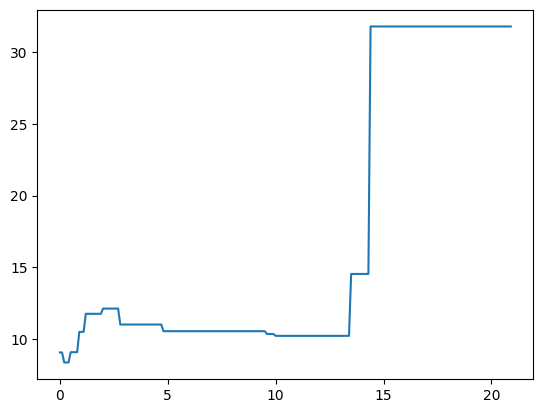

In [35]:
plt.plot(np.arange(0, 21, 0.1), list_erreur_max)

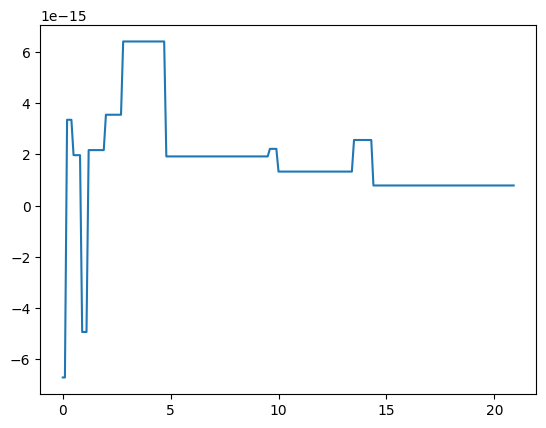

In [36]:
plt.plot(np.arange(0, 21, 0.1), list_erreur_moyenne)

In [37]:
np.mean(list_erreur_max), np.mean(list_erreur_moyenne)

(17.419385498967372, 1.842382801288011e-15)

In [38]:
list_erreur_max[100], list_erreur_moyenne[100]

(10.237579499929371, 1.3322676295501878e-15)

In [39]:
#pour lmbda = 10 on a une erreur moyenne = 1.33 et une erreur max = 10 qui se rapproche de la moyenne de toute les erreurs moyenne, et la moyenne de toute les erreurs maximales

In [40]:
#pour lambda 10
exo_lasso_10 = LpProblem(name="Ozone_LASSO_10", sense=LpMinimize)
z = LpVariable.matrix("z", list(range(1, len(x_norm)+1)))
    

b = LpVariable.matrix("b", list(range(1, 5)))
    
betas = LpVariable.matrix("betas", list(range(1, 5)))
    
exo_lasso_10 += (lpSum(z) + 10 * lpSum(b))
    
for i in range(len(x_norm)):
        exo_lasso_10 += z[i] >= y_norm[i] - lpSum(betas * x_norm[i])
        exo_lasso_10 += z[i] >= -y_norm[i] + lpSum(betas * x_norm[i])
    
   
for j in range(4):
    exo_lasso_10 += b[j] >= betas[j]
    exo_lasso_10 += b[j] >= -betas[j]
    
    
status = exo_lasso_10.solve(solver=GLPK(msg=False,keepFiles=False))
    
#valeurs des betas (pas beta 0)
betas_opti = [value(betas[i]) / x_ecart[i] for i in range(4)]
#valeur beta 0
beta0 = np.mean(y3) - np.sum([value(betas[i]) * x_mean[i] / x_ecart[i]  for i in range(4)])
ecart = [y3[i] - beta0 - np.sum([betas_opti[j] * ozone[i][j] for j in range(4)]) for i in range(18)]
print("Lambda = 10", "Erreur max = ", np.max(ecart), "   Erreur moyenne = ", np.mean(ecart))
    
    

Lambda = 10 Erreur max =  10.237579499929371    Erreur moyenne =  1.3322676295501878e-15


In [41]:
test = pd.read_csv("ozoneTest.csv", header=None)

x_test = test.iloc[:, :-1].to_numpy()
y_test = df.iloc[:, -1].to_numpy()
x_test,y_test

(array([[57,  7, 40, 33],
        [11, 32, 31, 24],
        [23, 24, 27, 25],
        [28, 21, 34, 15],
        [11, 12, 23, 31],
        [39, 17, 16,  8],
        [57, 29, 68, 29],
        [28, 32,  2, 15],
        [ 7,  6, 31,  9],
        [57, 17, 68, 40],
        [ 3, 32, 16,  8],
        [97, 42, 40, 21],
        [57, 16, 35, 23],
        [71, 42, 60, 40],
        [ 7, 21, 22, 10],
        [23, 27, 11,  5],
        [31, 16, 31, 23],
        [42, 21, 23, 29]]),
 array([ 3, 15, 19, 27, 23, 23, 31, 39, 47, 51, 47, 51, 55, 63, 67, 71, 71,
        75]))

In [42]:
y_pred = np.array([beta0 + np.sum([value(betas_opti[j]) * x_test[i][j] for j in range(4)]) for i in range(len(x_norm))])
y_pred

array([50.48163706, 25.64363918, 32.12311689, 34.82289927, 25.64363918,
       40.7624205 , 50.48163706, 34.82289927, 23.48381328, 50.48163706,
       21.32398738, 72.07989608, 50.48163706, 58.04102772, 23.48381328,
       32.12311689, 36.4427687 , 42.38228993])

In [43]:
Sr = np.sum((y_test - y_pred)**2)
residu_norm = (y_test-y_pred)/np.sqrt(Sr/(len(x_test) - 2))
residu_norm

array([-1.83731088, -0.41185762, -0.50780148, -0.30270856, -0.10229612,
       -0.6873202 , -0.75384561,  0.1616337 ,  0.90996327,  0.02005815,
        0.99353814, -0.81569054,  0.1748389 ,  0.19188837,  1.68386703,
        1.5043483 ,  1.33719857,  1.26214843])

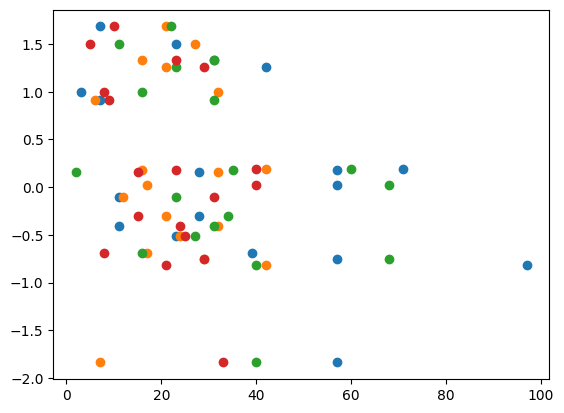

In [44]:
plt.scatter(x_test[:, 0], residu_norm)
plt.scatter(x_test[:, 1], residu_norm)
plt.scatter(x_test[:, 2], residu_norm)
plt.scatter(x_test[:, 3], residu_norm)

In [45]:
#les residus sont places aleatoirement, le modele est valide